# Introduction

In a previous Notebook, we did an exploration of the Codingame LeaderBoard. After a discussion regarding programming languages, I wanted to take a look at the use of them on Codingame Contest. To do so, we will extract few datas from the last 8 contest and look at the use and score for languages.

# Extraction

The Leaderbord API changed on Codingame not a long time ago and provide ranking by 1k player but there is no pâge anymore. To extract those datas, we will query the result for every league of the 9 last contest. This is beacuse there is never 1k person in a specific league.

In [69]:
import json
from bson import json_util

import numpy as np
import pandas as pd

import urllib

from collections import defaultdict

import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

cmap = matplotlib.cm.get_cmap('nipy_spectral')

In [2]:
challenges = [
    "code-of-kutulu",
    "code-royale",
    "botters-of-the-galaxy",
    "mean-max",
    "wondev-woman",
    "coders-of-the-caribbean",
    "ghost-in-the-cell",
    "hypersonic",
    "codebusters"
]

leagues = [
    "LEGEND",
    "gold",
    "silver",
    "bronze",
]

You can see below the json of 1 line of the leaderboard. We will keep on this only few information (some of them won't be used but will be available if needed).

In [3]:
url = "https://www.codingame.com/services/LeaderboardsRemoteService/getFilteredChallengeLeaderboard"
data = '["code-of-kutulu",null,"global",{"active":false,"column":"","filter":""}]'
data = data.encode('utf-8')
req = urllib.request.Request(url, data)
response = urllib.request.urlopen(req)
content = response.read()
parsed_content = json.loads(content)

parsed_content['success']["users"][0]

{'agentId': 1929755,
 'codingamer': {'avatar': 19518608272427,
  'category': 'STUDENT',
  'countryId': 'SK',
  'enable': False,
  'level': 12,
  'pseudo': 'blasterpoard',
  'publicHandle': '47a1a3e98084996d79f00ad195cf67d57867752',
  'schoolId': 168,
  'userId': 2577687,
  'userValid': False},
 'creationTime': 1529868138876,
 'eligibleForPromotion': False,
 'inProgress': False,
 'league': {'divisionCount': 7, 'divisionIndex': 6, 'openingLeaguesCount': 0},
 'localRank': 1,
 'percentage': 100,
 'programmingLanguage': 'C++',
 'progress': 'EQUAL',
 'pseudo': 'blasterpoard',
 'rank': 1,
 'school': 'Masaryk University',
 'score': 34.35,
 'testSessionHandle': '11806064280972e101cb4be732d6364769a959b1',
 'updateTime': 1529941519894}

In [4]:
ranking = defaultdict(list)

for challenge in challenges:
    for league in leagues:
        url = "https://www.codingame.com/services/LeaderboardsRemoteService/getFilteredChallengeLeaderboard"
        data = '["'+challenge+'",null,"global",{"active":true,"column":"SLEAGUE","filter":"'+league+'"}]'
        data = data.encode('utf-8')
        print("Fetchind data from {} in league {}".format(challenge, league))
        req = urllib.request.Request(url, data)
        response = urllib.request.urlopen(req)
        content = response.read()
        parsed_content = json.loads(content)
        if "success" in parsed_content.keys():
            for user in parsed_content["success"]["users"]:
                ranking["challenge"].append(challenge)
                ranking["league"].append(league)
                ranking["agentId"].append( user.get("agentId", np.nan) )
                ranking["level"].append(user["codingamer"].get("level", np.nan))
                ranking["pseudo"].append(user["codingamer"].get("pseudo", np.nan))
                ranking["userId"].append(user["codingamer"].get("userId", np.nan))
                ranking["rank"].append(user.get("rank", np.nan))
                ranking["programmingLanguage"].append(user.get("programmingLanguage", np.nan))
                ranking["score"].append(user.get("score", np.nan))
        else:
            print("Error :(")

Fetchind data from code-of-kutulu in league LEGEND
Fetchind data from code-of-kutulu in league gold
Fetchind data from code-of-kutulu in league silver
Fetchind data from code-of-kutulu in league bronze
Fetchind data from code-royale in league LEGEND
Fetchind data from code-royale in league gold
Fetchind data from code-royale in league silver
Fetchind data from code-royale in league bronze
Fetchind data from botters-of-the-galaxy in league LEGEND
Fetchind data from botters-of-the-galaxy in league gold
Fetchind data from botters-of-the-galaxy in league silver
Fetchind data from botters-of-the-galaxy in league bronze
Fetchind data from mean-max in league LEGEND
Fetchind data from mean-max in league gold
Fetchind data from mean-max in league silver
Fetchind data from mean-max in league bronze
Fetchind data from wondev-woman in league LEGEND
Fetchind data from wondev-woman in league gold
Fetchind data from wondev-woman in league silver
Fetchind data from wondev-woman in league bronze
Fetchi

Now we can create the dataset and save it for exploration

In [5]:
df = pd.DataFrame(ranking)
df.to_csv("ranking.csv", index=False )
del ranking

In [6]:
df.head()

,agentId,challenge,league,level,programmingLanguage,pseudo,rank,score,userId
0,1929755,code-of-kutulu,LEGEND,12,C++,blasterpoard,1,34.35,2577687
1,1932387,code-of-kutulu,LEGEND,42,C++,Agade,2,33.53,735910
2,1929753,code-of-kutulu,LEGEND,27,C++,y_kawano,3,32.89,610934
3,1929726,code-of-kutulu,LEGEND,23,C#,MSmits,4,32.46,2522090
4,1932175,code-of-kutulu,LEGEND,35,C#,Illedan,5,32.46,1378958


# Exploration

In [9]:
df = pd.read_csv("ranking.csv")

In [10]:
df.head()

,agentId,challenge,league,level,programmingLanguage,pseudo,rank,score,userId
0,1929755,code-of-kutulu,LEGEND,12,C++,blasterpoard,1,34.35,2577687
1,1932387,code-of-kutulu,LEGEND,42,C++,Agade,2,33.53,735910
2,1929753,code-of-kutulu,LEGEND,27,C++,y_kawano,3,32.89,610934
3,1929726,code-of-kutulu,LEGEND,23,C#,MSmits,4,32.46,2522090
4,1932175,code-of-kutulu,LEGEND,35,C#,Illedan,5,32.46,1378958


First, let's give a rank to each language by number of occurence in the dataset

In [11]:
order_Language = df.programmingLanguage.value_counts().index.tolist()
order_Language = { lang : rank+1 for rank, lang in enumerate(order_Language) }
df["rankingLanguage"] = df.programmingLanguage.apply(lambda x:order_Language[x])
df["league"] = df["league"].str.title()
df.head()

,agentId,challenge,league,level,programmingLanguage,pseudo,rank,score,userId,rankingLanguage
0,1929755,code-of-kutulu,Legend,12,C++,blasterpoard,1,34.35,2577687,1
1,1932387,code-of-kutulu,Legend,42,C++,Agade,2,33.53,735910,1
2,1929753,code-of-kutulu,Legend,27,C++,y_kawano,3,32.89,610934,1
3,1929726,code-of-kutulu,Legend,23,C#,MSmits,4,32.46,2522090,3
4,1932175,code-of-kutulu,Legend,35,C#,Illedan,5,32.46,1378958,3


Now we can plot the position for every challenge of every language. The color will reflect the league 

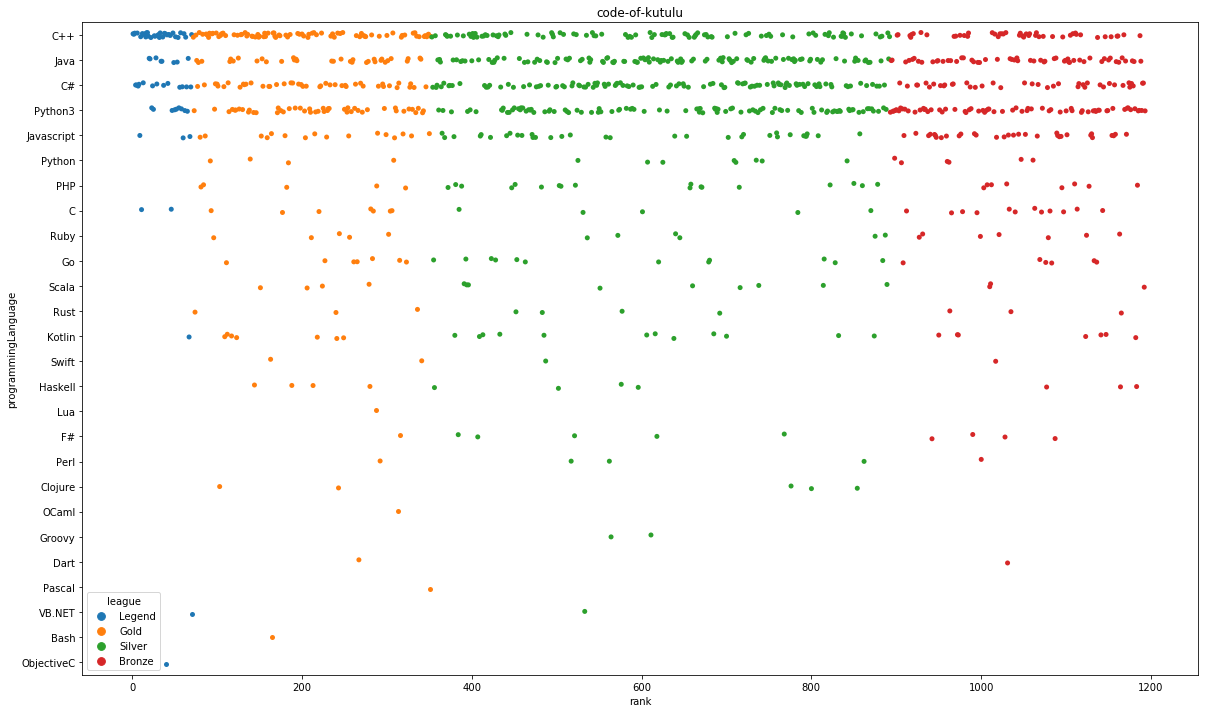

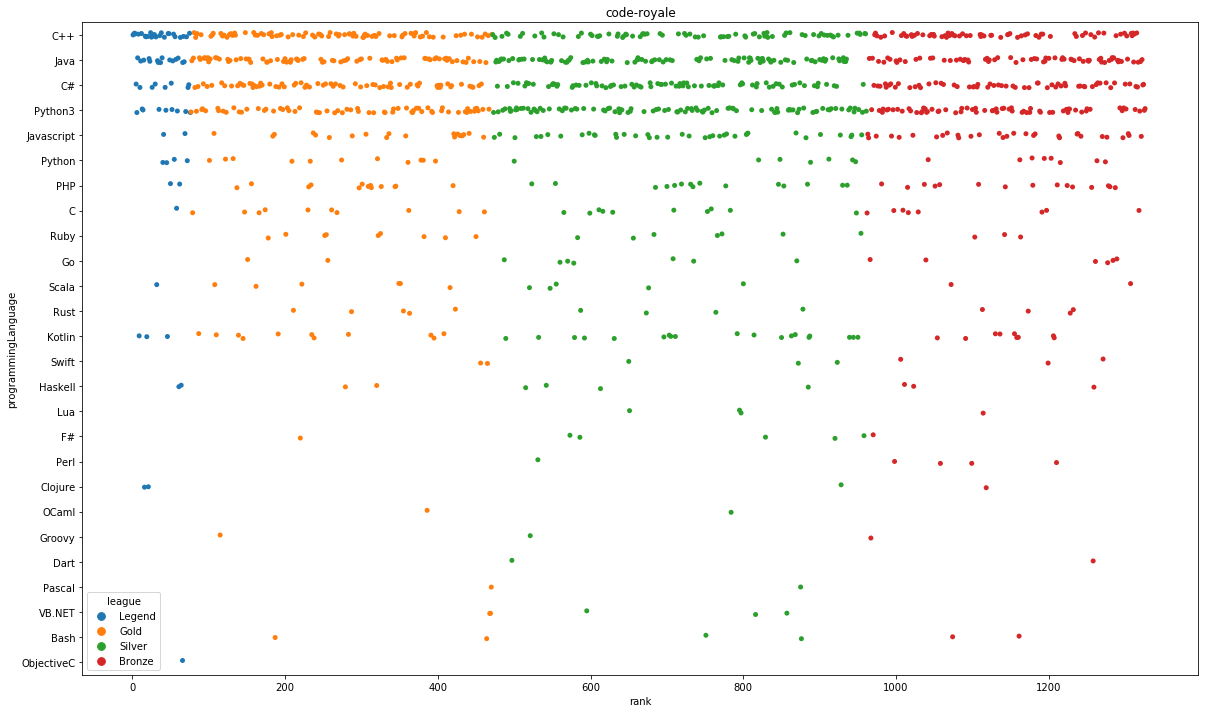

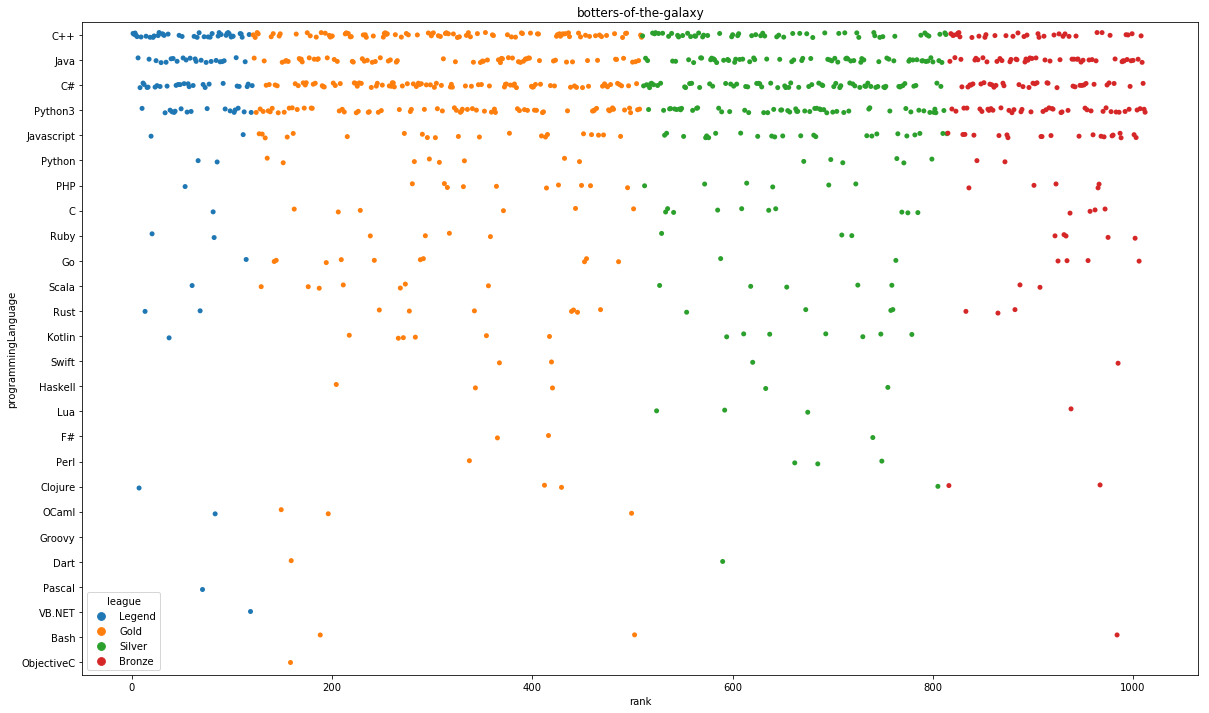

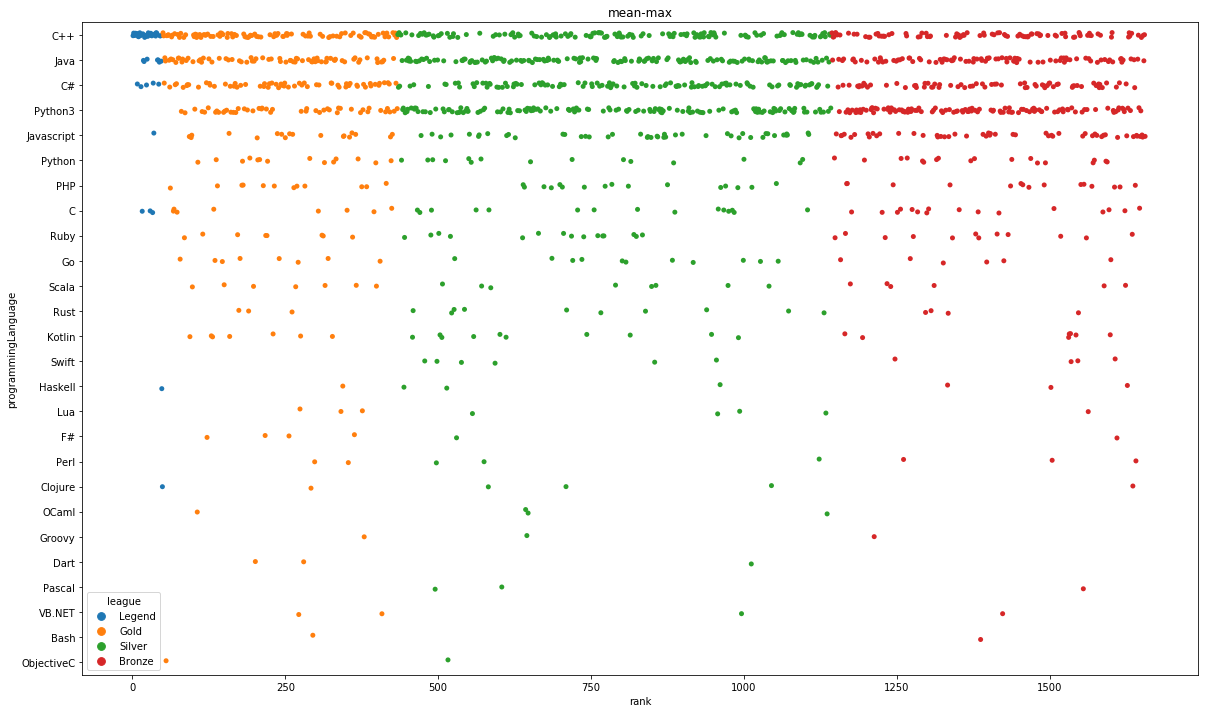

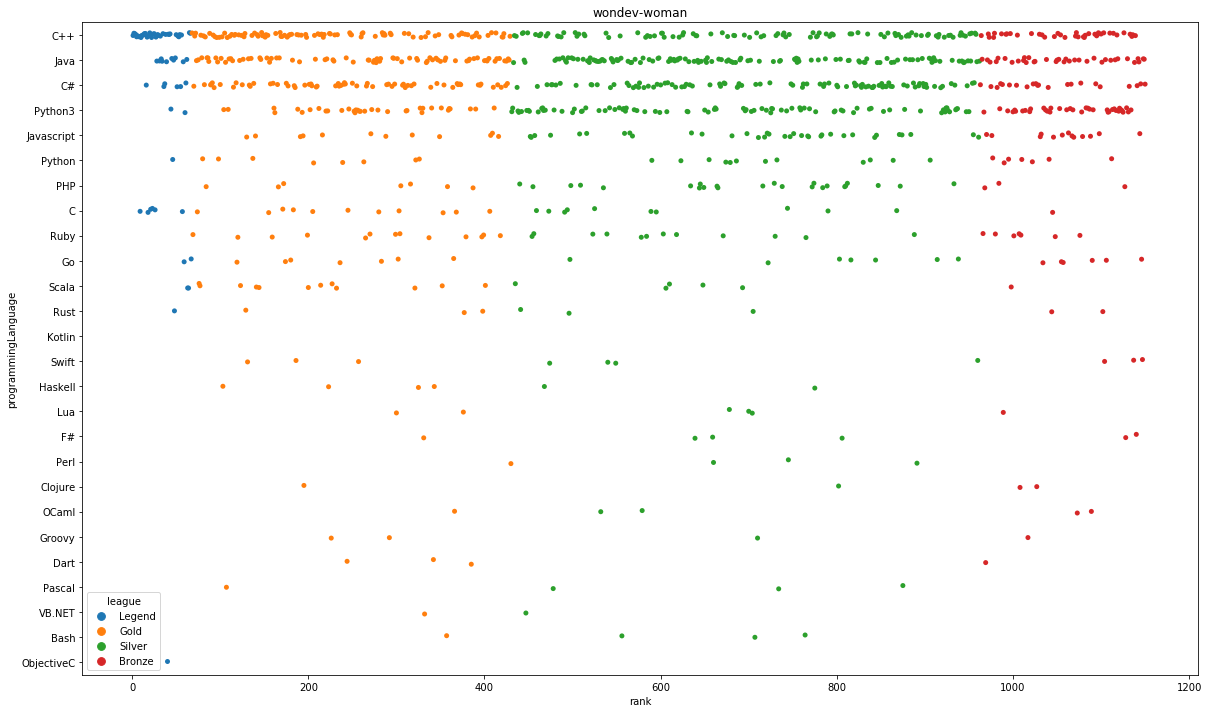

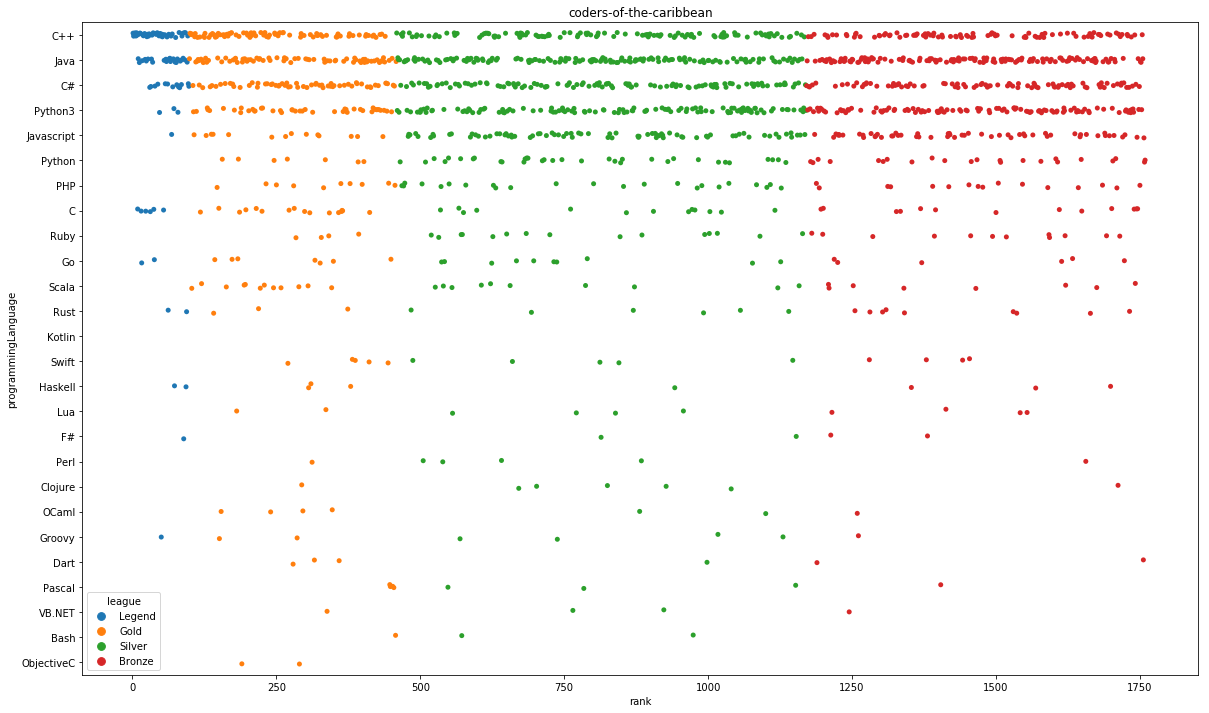

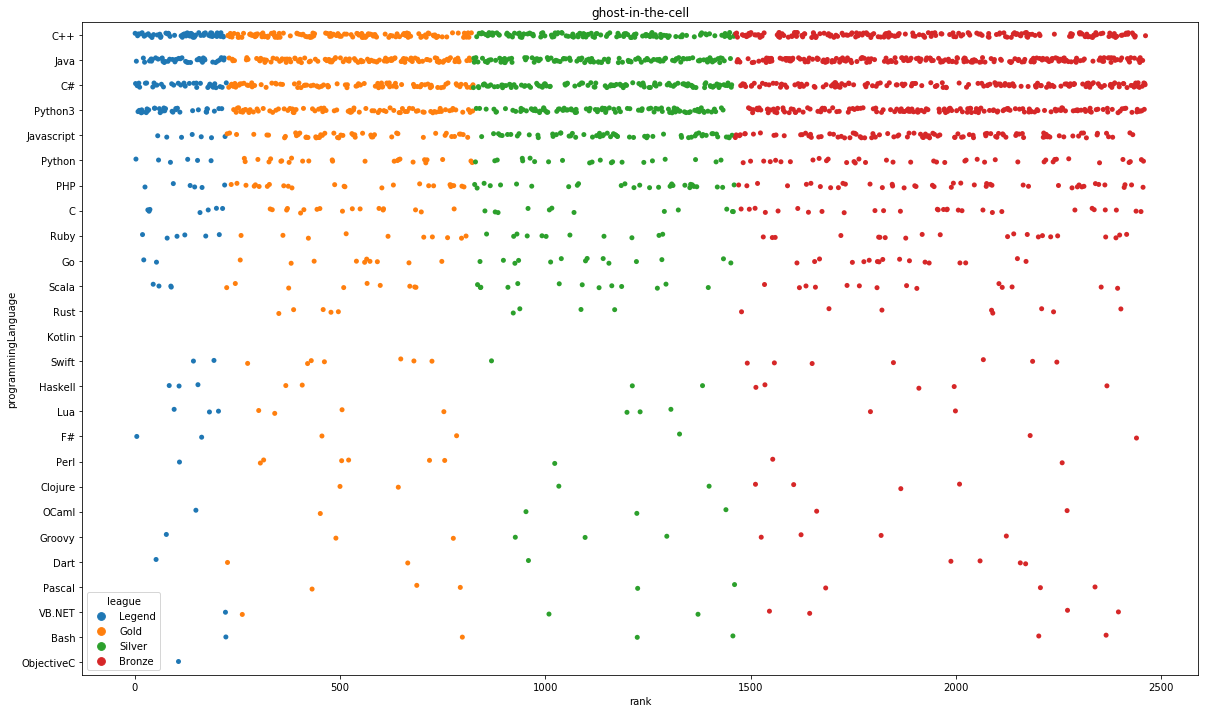

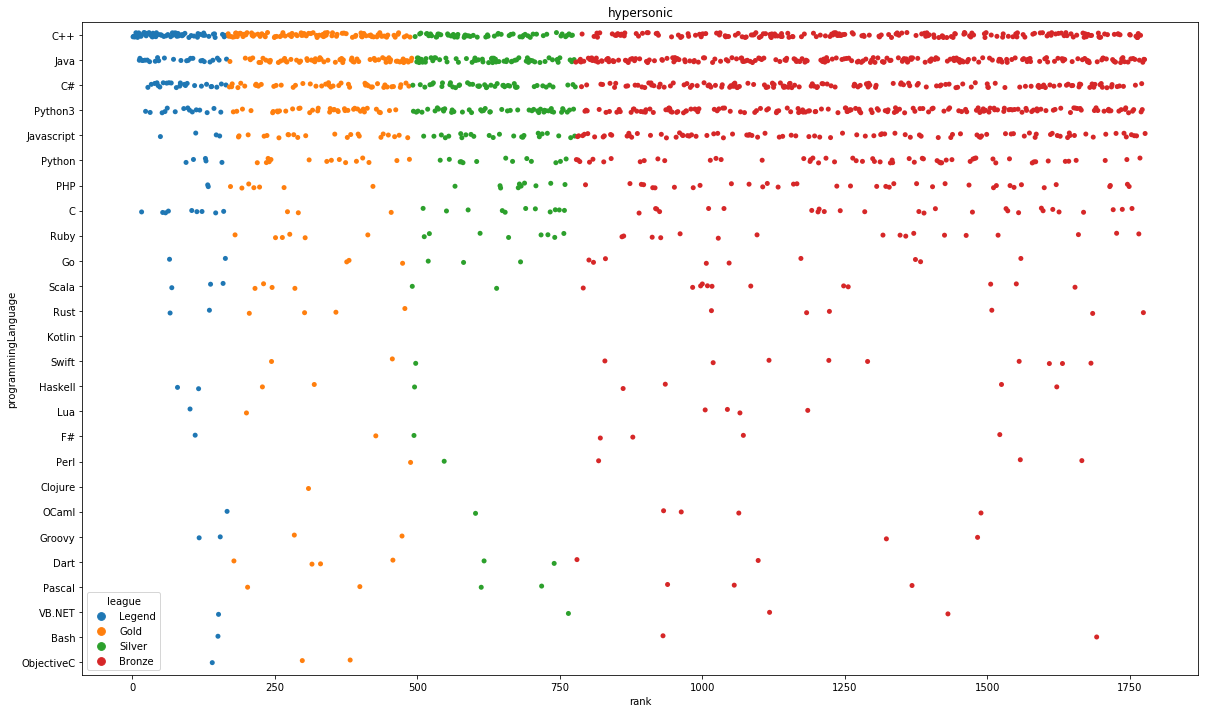

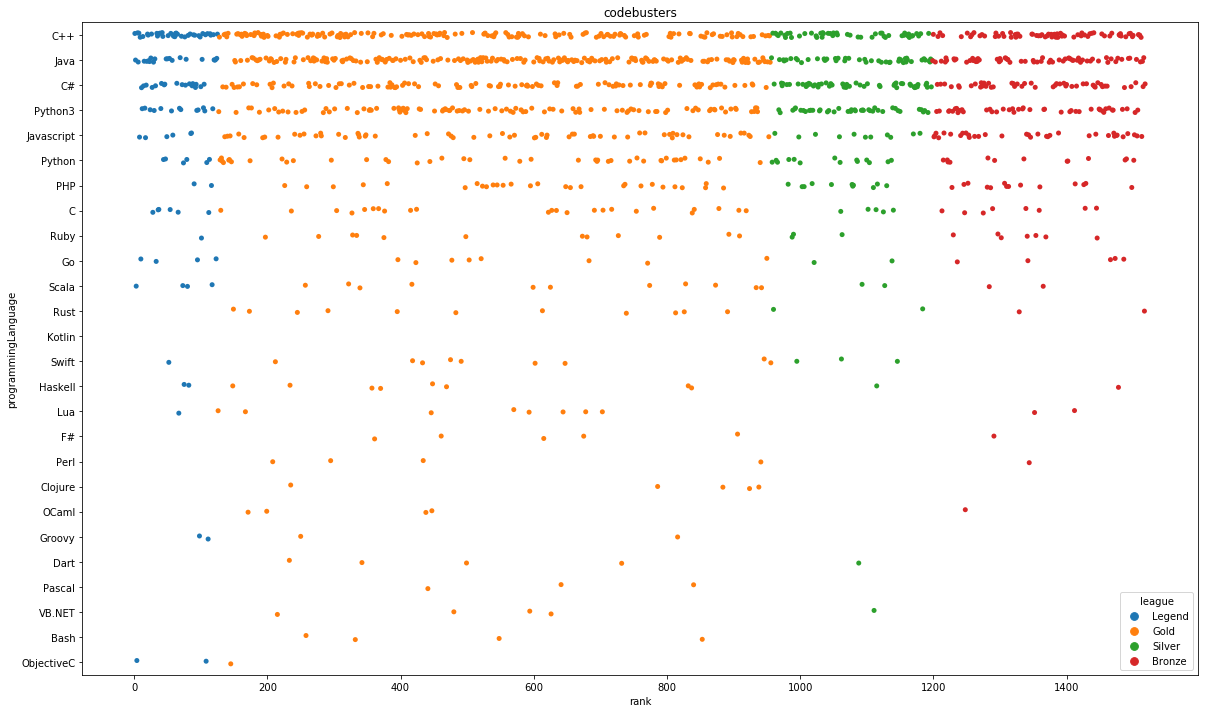

In [13]:
for challenge in challenges:
    plt.figure(figsize=(20,12))
    sns.stripplot(x="rank", 
                  y="programmingLanguage", 
                  data=df[df.challenge == challenge], 
                  hue="league", 
                  jitter =0.1,
                  order=order_Language )
    plt.title(challenge)
    plt.show()

There is several language nearly not used. Let's merge them into a group "other"

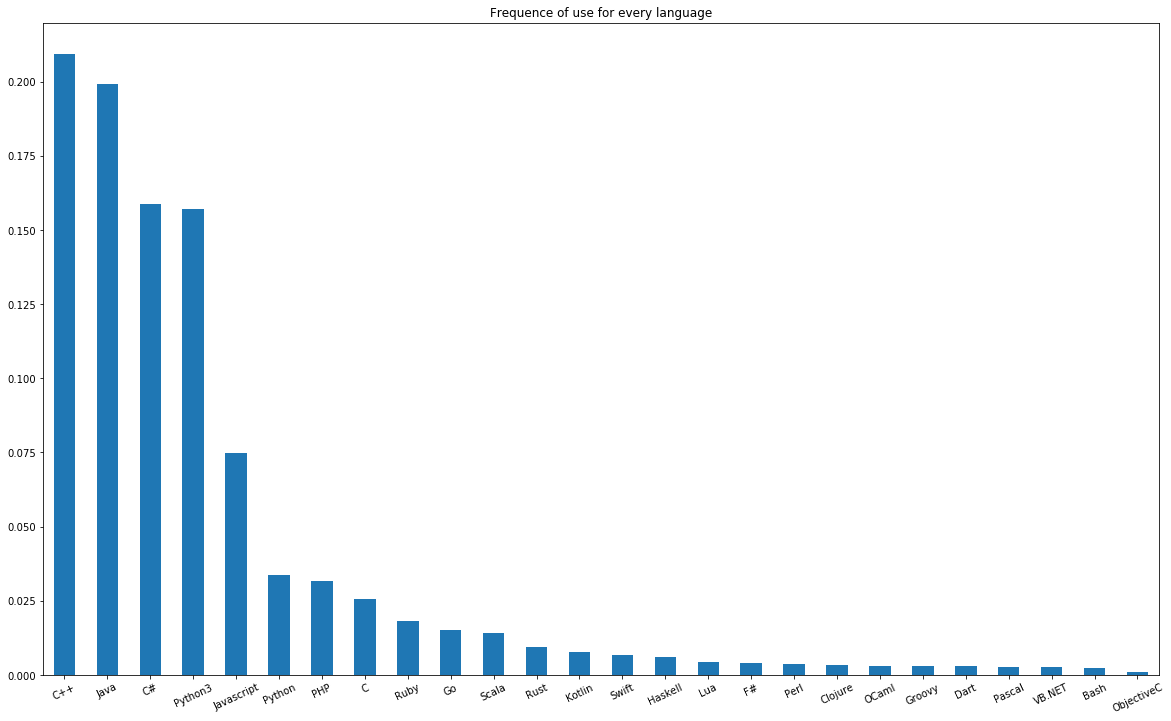

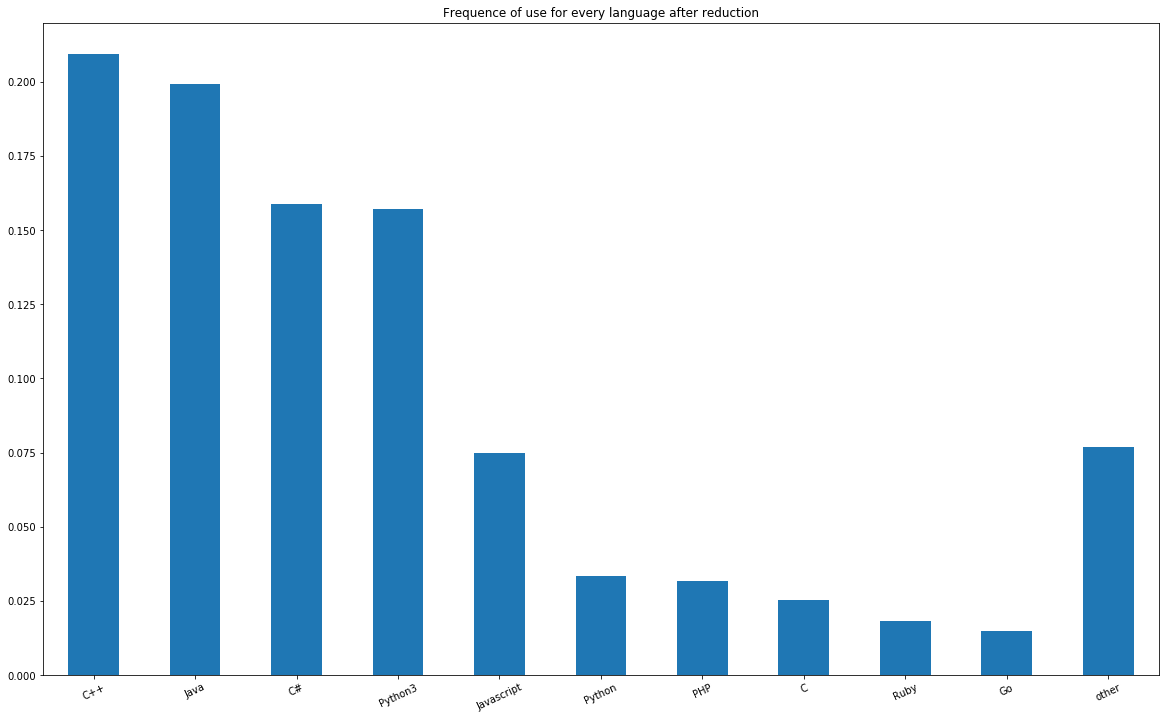

In [15]:
prob = df["programmingLanguage"].value_counts(normalize=True)

plt.figure(figsize = (20,12))
prob.plot(kind='bar')
plt.xticks(rotation=25)
plt.title("Frequence of use for every language")
plt.show()

threshold = 0.015
mask = prob > threshold
tail_prob = prob.loc[~mask].sum()
prob = prob.loc[mask]
prob['other'] = tail_prob

kept = prob.index

df["Language_short"] = df["programmingLanguage"].apply(lambda x : x if x in kept else "other")

plt.figure(figsize = (20,12))
prob.plot(kind='bar')
plt.xticks(rotation=25)
plt.title("Frequence of use for every language after reduction")
plt.show()

Now let's do a count for every league of every challenge the number of users

In [53]:
df2 = df[["challenge", "league", "Language_short"]]

df2["Count"] = 1

df2 = df2.groupby(["challenge", "league", "Language_short"]).agg({
    "Count" : "sum"
})

df2 = df2.reset_index()

C:\python36\envs\machine_learning\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [54]:
df2[(df2["challenge"] == "code-of-kutulu") & (df2["league"] == "Legend")]

,challenge,league,Language_short,Count
66,code-of-kutulu,Legend,C,2
67,code-of-kutulu,Legend,C#,13
68,code-of-kutulu,Legend,C++,33
69,code-of-kutulu,Legend,Java,8
70,code-of-kutulu,Legend,Javascript,3
71,code-of-kutulu,Legend,Python3,9
72,code-of-kutulu,Legend,other,3


Now we have the number of player for every language, league and competition. We can look at the percentage on every leagues with pie or stacked bar.

In [56]:
colorLanguage = { lang : cmap(i*len(order_Language)) for i, lang in enumerate(kept) }

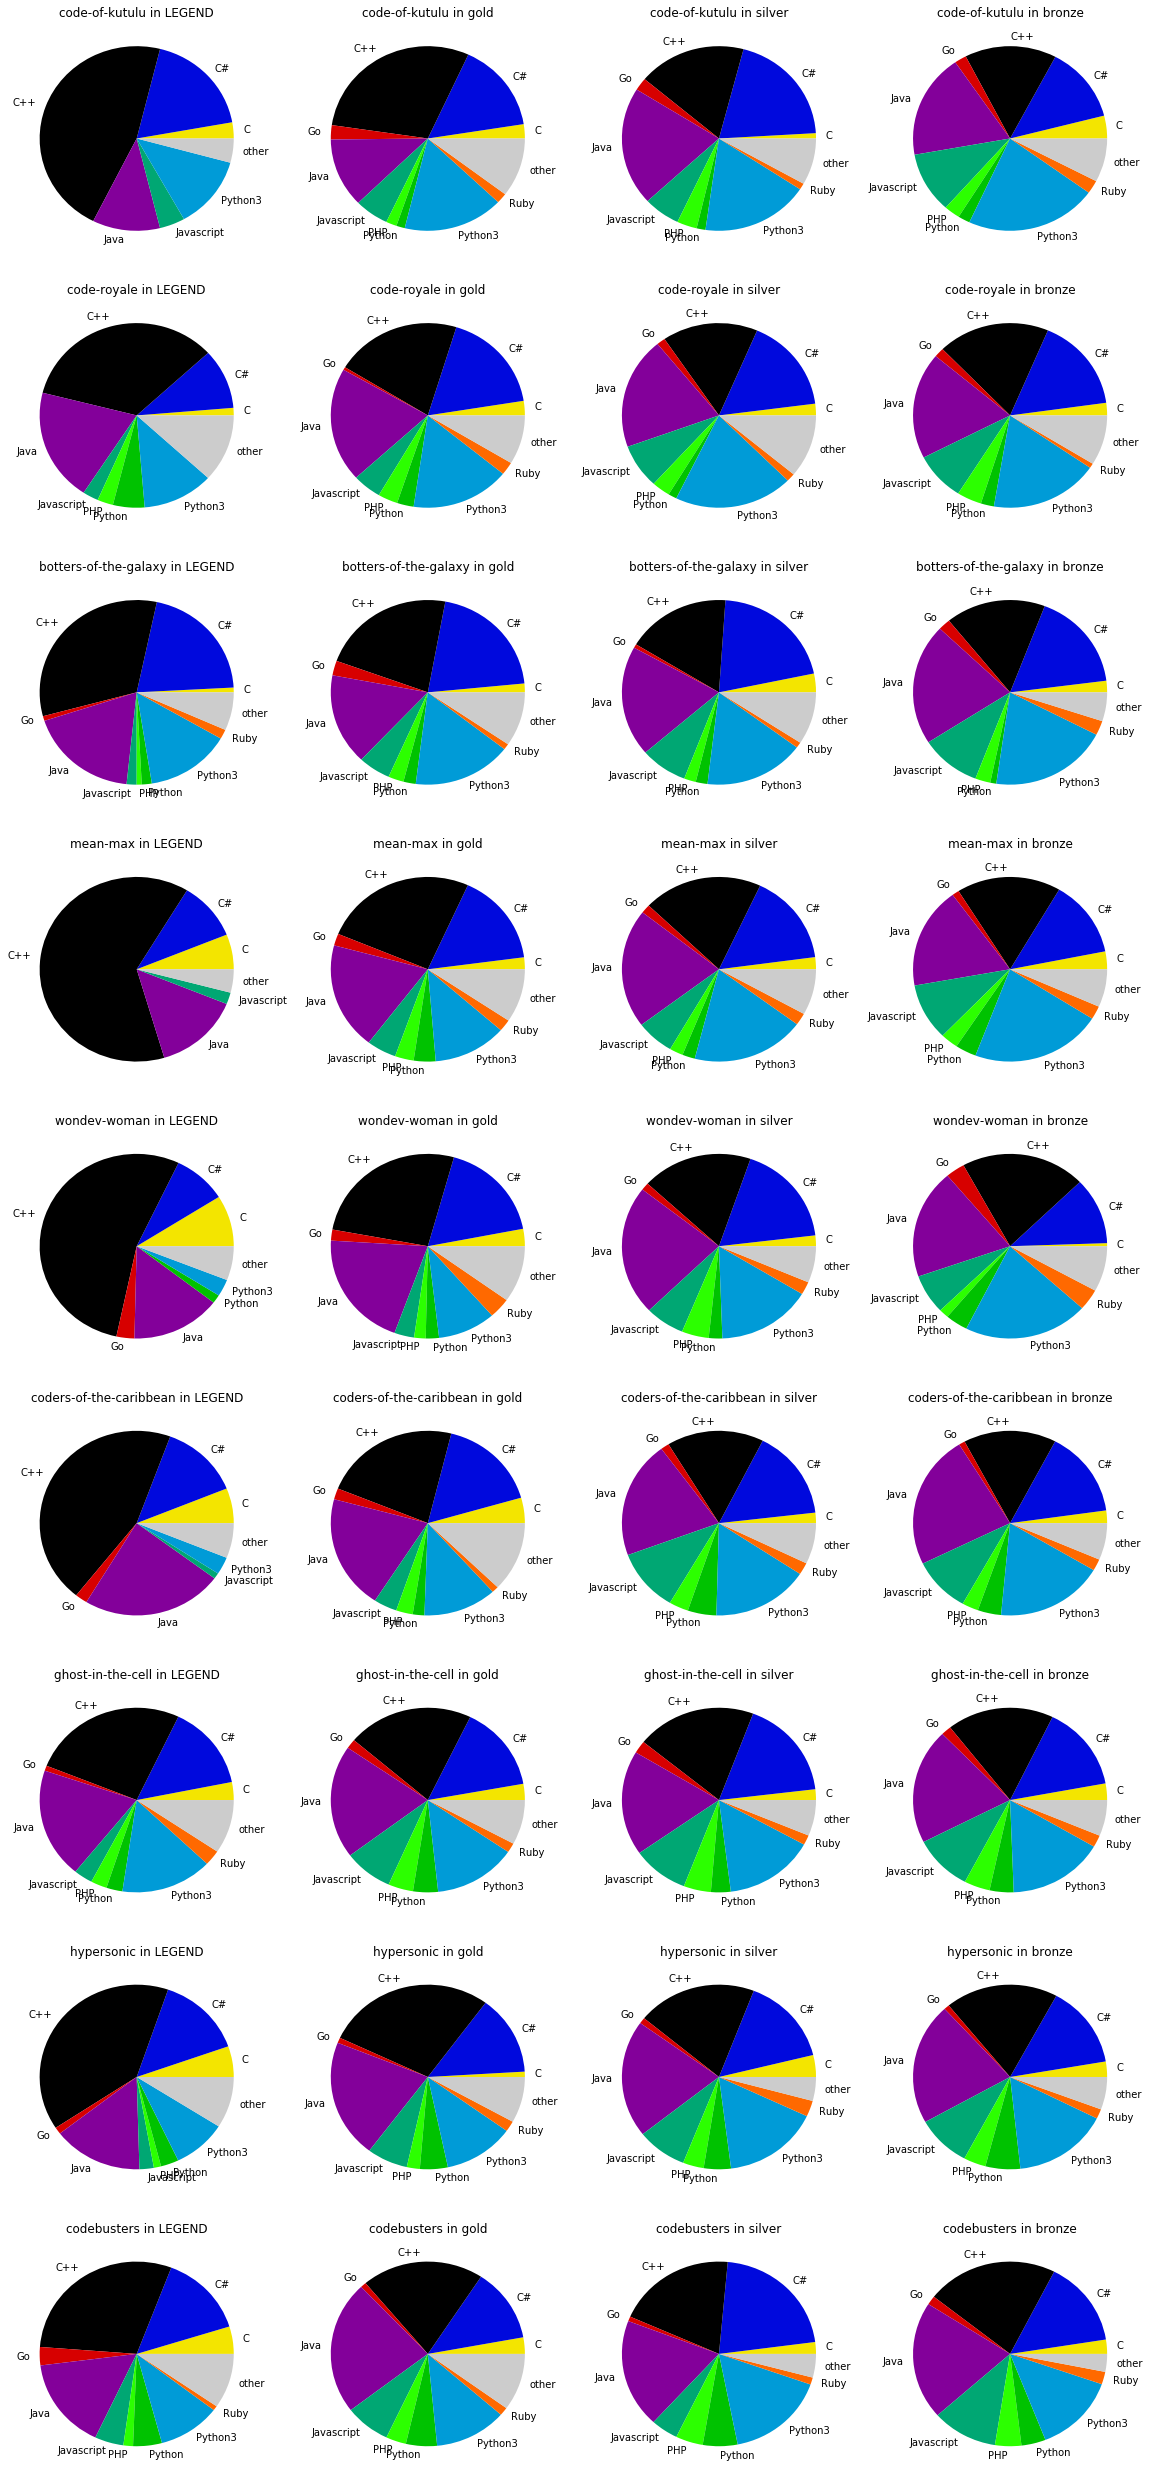

In [58]:
fig, axes = plt.subplots(9, 4, figsize=(20,45))
for i, challenge in enumerate(challenges):
    for j, league in enumerate(leagues):
        sub = df2[(df2["challenge"] == challenge) & (df2["league"] == league.title())]
        x = sub["Count"]
        y = sub["Language_short"]
        c = [colorLanguage[k] for k in y.values]
        axes[i, j].pie(x=x, labels=y, colors=c)
        axes[i, j].set_title("{} in {}".format(challenge, league))

In [64]:
result = []
for i, challenge in enumerate(challenges):
    for j, league in enumerate(leagues):
        sub = df2[(df2["challenge"] == challenge) & (df2["league"] == league.title())]
        x = sub["Count"].values.tolist()
        y = sub["Language_short"].values.tolist()
        temp = [x[y.index(l)] if l in y else 0 for l in kept]
        result.append(temp)

result = np.array(result, dtype = np.float)
result = result / np.linalg.norm(result, axis=1, ord=1, keepdims=True)
result = np.cumsum(result, axis=1)*100

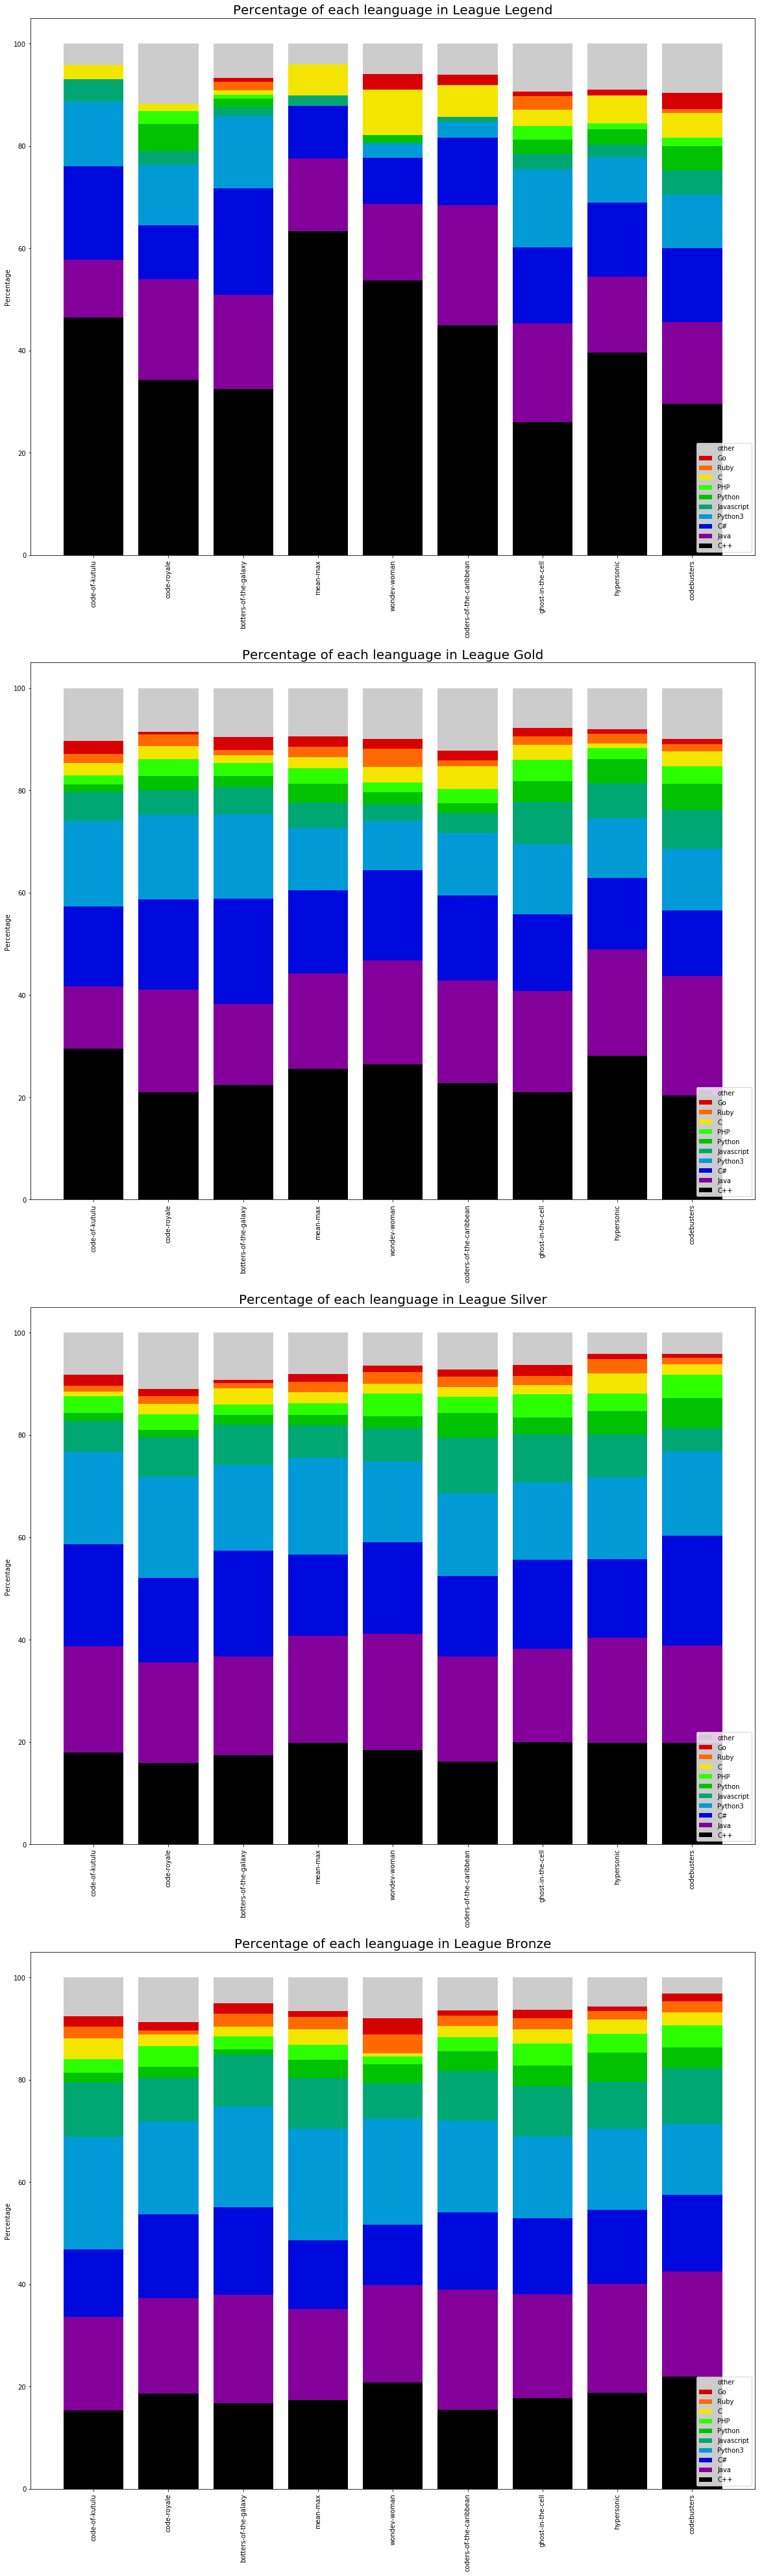

In [68]:
fig, axes = plt.subplots(4, 1, figsize=(20, 70))

X = np.arange(9)
for i in range(4):
    for j in range(10, -1, -1):
        axes[i].bar(X, test[i::4, j], label=kept[j], color=colorLanguage[kept[j]])
    
    axes[i].set_ylabel('Percentage')
    axes[i].set_title('Percentage of each leanguage in League {}'.format(leagues[i].title()), fontsize=20)
    axes[i].set_xticks(X)
    axes[i].set_xticklabels(challenges, rotation=90)
    axes[i].legend(loc = 4)

plt.show()

What we can see is that C++ is mainly used in high leagues. There is 2 reasons for that :

- This is the best language for coding IA because it's faster even if it's more complicated
- This language is knows by best players which are always in top leagues

So what we can do also if look at number of user for every language

In [118]:
df_user = df.groupby(["userId", "programmingLanguage", "league", "challenge"]).agg({
    "rank" : min
})

df_user.head()

rank
userId programmingLanguage league challenge              
152907 Java                Bronze ghost-in-the-cell  2349
152944 Java                Bronze hypersonic          907
153021 Python3             Silver hypersonic          716
153030 C++                 Legend code-royale          36
                                  codebusters          42

Let's now pre-process it to have 1 row per user the number of time they use a specific language. This will allow to count how many users are using each language and see the "popularity"

In [119]:
df_user = df_user.reset_index()
language_OHE = pd.get_dummies(df_user["programmingLanguage"])#.mul(df_user["rank"], 0)
df_user2 = pd.concat([df_user[["userId"]], language_OHE], axis=1)
df_user2.head()
df_user2 = df_user2.groupby(["userId"]).sum()

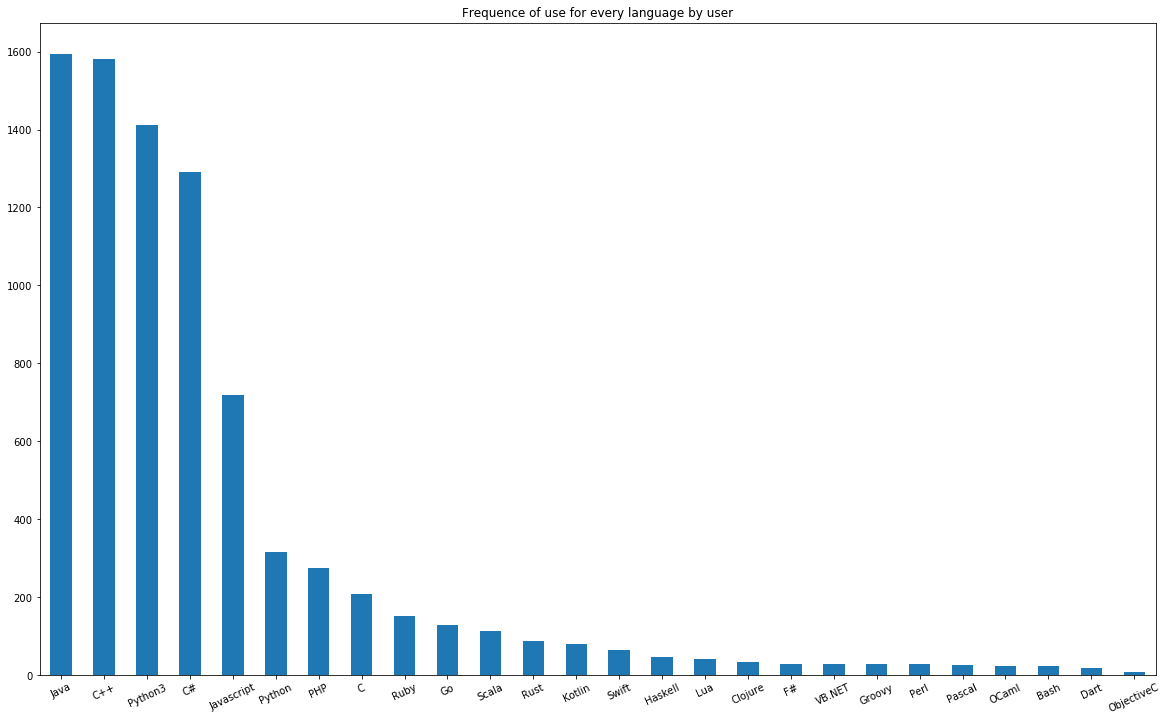

In [127]:
plt.figure(figsize = (20,12))
df_user2[df_user2 > 0].count().sort_values(ascending=False).plot(kind='bar')
plt.xticks(rotation=25)
plt.title("Frequence of use for every language by user")
plt.show()

We can see that the result is not the same ranking as what we found when we looked at every player of every competition. Now we reduce it by user meaning that  if a top player did every challenge in C++, now it's considered as 1 because that means he know C++. 

Now Java is most used one with 1600 players followed by C++. C# and Python are slighly after but closer to the top one compare to previously.

# Result

We can see that in a global overview C++ is the most used one in high level competition. It's close to Java which seems to be efficient too. In lower leagues, multiple languages are fighting together. 

In term of known language, Java is first but C++ is not far behind. Based on the domination of C++ in high leagues, we can say that this is mainly due because users in Top leagues are used to code in C++ but also they are participating is nearly all challenges in top leagues. 